In [75]:
#installing librariers of six and pydotplus for tree graph, if they are not available

!pip install six

!pip install pydotplus

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from six import StringIO  
from IPython.display import Image  
import pydotplus

## 1. Data Understanding & Exploration:

### A.Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [3]:
data1=pd.read_csv('TelcomCustomer-Churn_1.csv')

In [4]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
data1.shape

(7043, 10)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [7]:
data2=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [8]:
data2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [10]:
data2.shape

(7043, 12)

### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [11]:
telecom=pd.merge(data1,data2, on='customerID', how='inner')

In [12]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
telecom.shape

(7043, 21)

In [14]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [15]:
data1_col=data1.columns.to_list()

In [16]:
data1_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [17]:
data2_col=data2.columns.to_list()

In [18]:
data2_col

['customerID',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [19]:
#removing CustomerID
data2_col.remove('customerID')

In [20]:
data2_col

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [21]:
combine_col=data1_col+data2_col
combine_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [22]:
len(combine_col)

21

In [23]:
merge_col=telecom.columns.to_list()
merge_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [24]:
len(merge_col)

21

In [25]:
#Comparing if columns are properly incorporated

if (combine_col == merge_col):
    print("All the columns are incorporated in merge")
else:
    print("All the columns are not incorporated in merge")

All the columns are incorporated in merge


## 2. Data Cleaning & Analysis

### A. Impute missing/unexpected values in the DataFrame

In [26]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**: Since there are too many object columns, lets check if they have any special character/null values

In [27]:
#checking for unique values for category values
obj_col=telecom.select_dtypes('object').columns.to_list()

for var in obj_col:
    print(var)
    print(telecom[var].unique())
    print('-'*50)

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
['Female' 'Male']
--------------------------------------------------
Partner
['Yes' 'No']
--------------------------------------------------
Dependents
['No' 'Yes']
--------------------------------------------------
PhoneService
['No' 'Yes']
--------------------------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup
['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection
['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport
['No' 'Yes' 'No internet service']
------------

In [28]:
#customer id and total charges have multiple values, checking Totalcharges if they have non digit value
# ignoring customerid as it will be removed for model selection
a=telecom['TotalCharges'].unique().tolist()

non_digits = [item for item in a if not item.replace('.', '', 1).isdigit()]
has_non_digits = bool(non_digits)
print(non_digits)    


[' ']


**observation**: total charges has ' ' values 

In [29]:
telecom['TotalCharges']=telecom['TotalCharges'].replace(' ',np.nan)

In [30]:
#checking for null values 
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
#since there are 7000+ rows, we can remove 11 null values of totalcharges

telecom.dropna(inplace=True)
telecom.reset_index(drop=True, inplace=True)

In [32]:
telecom.shape

(7032, 21)

In [33]:
telecom.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### B. Make sure all the variables with continuous values are of ‘Float’ type

In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [35]:
#Tenure, MonthlyCharges and Total charges have continuous values so changing their dataype to float
#MonthlyCharges us already float

telecom['tenure']=telecom['tenure'].astype(float)
telecom['TotalCharges']=telecom['TotalCharges'].astype(float)

In [36]:
#verifying
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [37]:
def create_pie_charts(dataframe):
    '''
    Function to create pie chart for categorical and object attributes of dataframe
    '''
    cat_col = dataframe.select_dtypes(include=['object', 'category'])

    for col in cat_col:
        feature_counts = dataframe[col].value_counts()
        total_count = feature_counts.sum()
        labels = feature_counts.index
        sizes = (feature_counts / total_count) * 100

        plt.figure(figsize=(5,4))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=sns.color_palette("tab10"))
        plt.title(f'{col} - Distribution', pad=15)
        plt.axis('equal')
        plt.legend(labels, loc='center right', bbox_to_anchor=(1.5,.5))
        plt.show()
        print('-'*100)

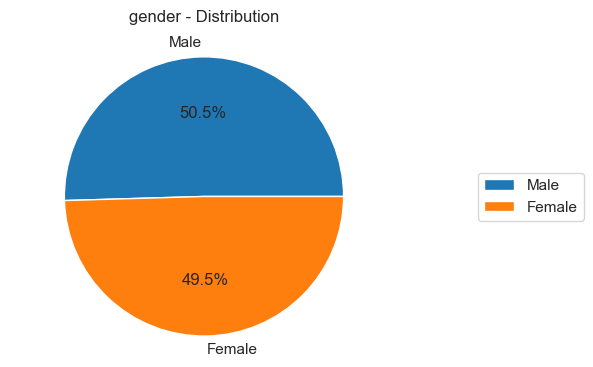

----------------------------------------------------------------------------------------------------


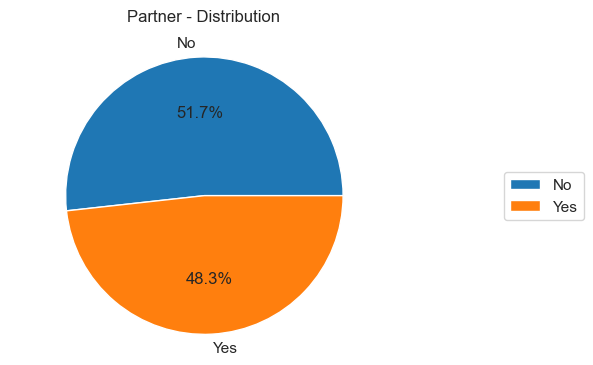

----------------------------------------------------------------------------------------------------


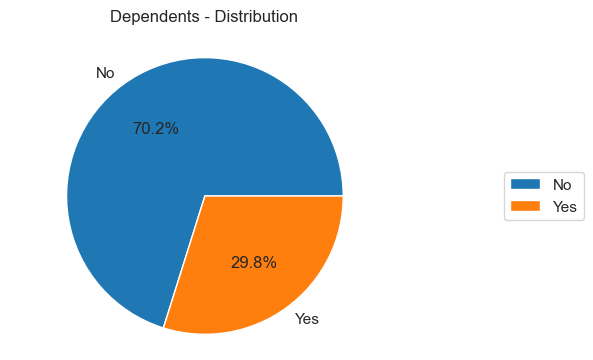

----------------------------------------------------------------------------------------------------


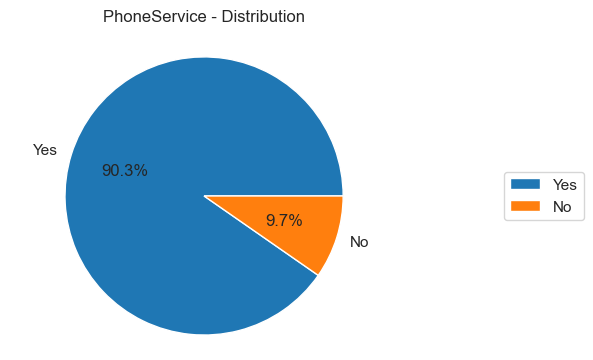

----------------------------------------------------------------------------------------------------


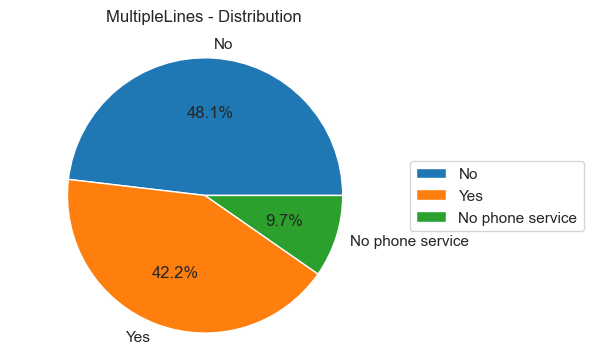

----------------------------------------------------------------------------------------------------


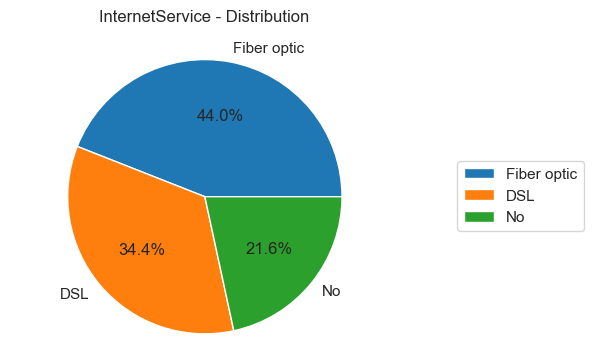

----------------------------------------------------------------------------------------------------


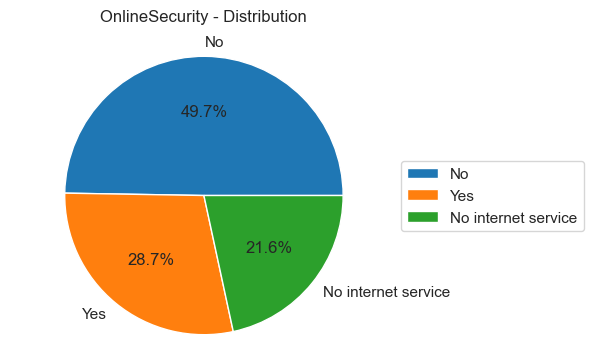

----------------------------------------------------------------------------------------------------


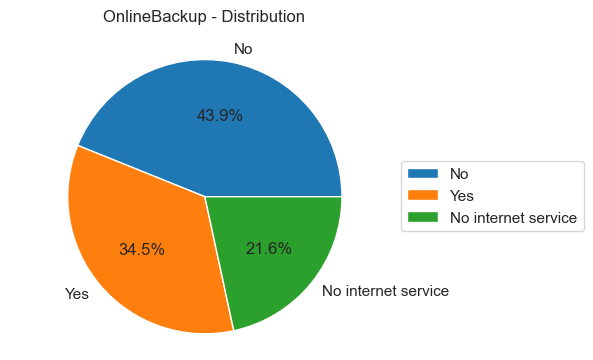

----------------------------------------------------------------------------------------------------


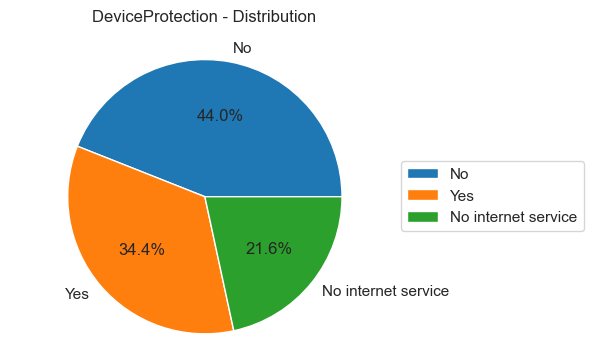

----------------------------------------------------------------------------------------------------


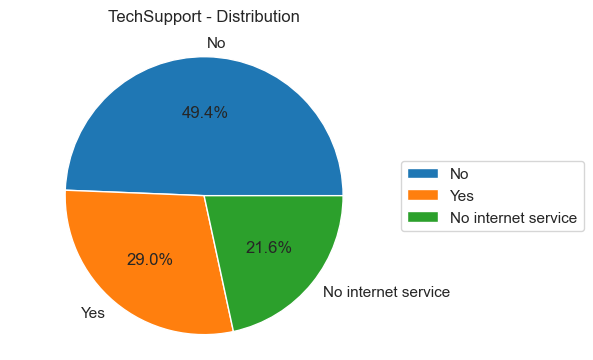

----------------------------------------------------------------------------------------------------


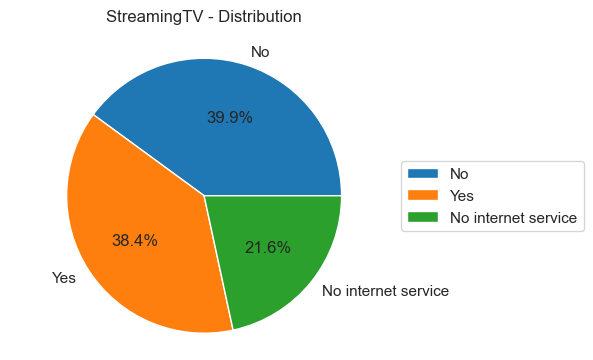

----------------------------------------------------------------------------------------------------


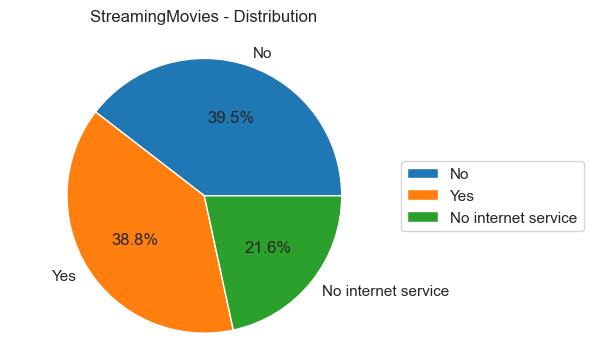

----------------------------------------------------------------------------------------------------


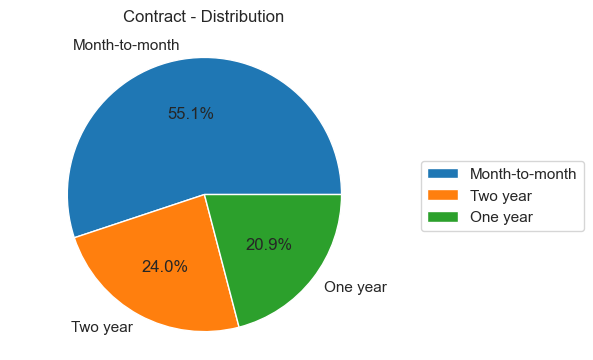

----------------------------------------------------------------------------------------------------


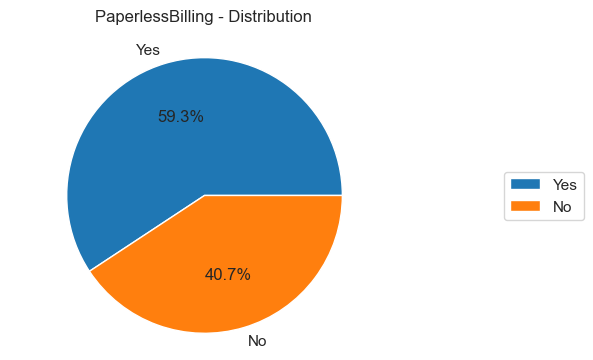

----------------------------------------------------------------------------------------------------


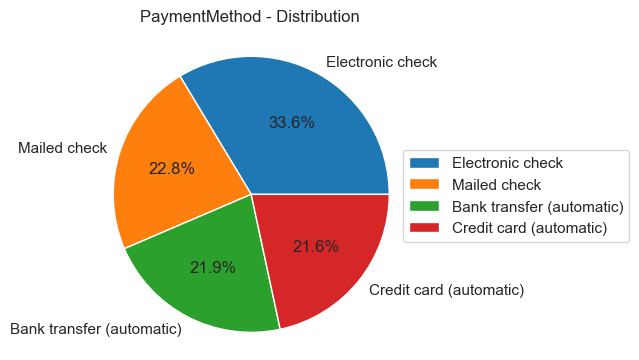

----------------------------------------------------------------------------------------------------


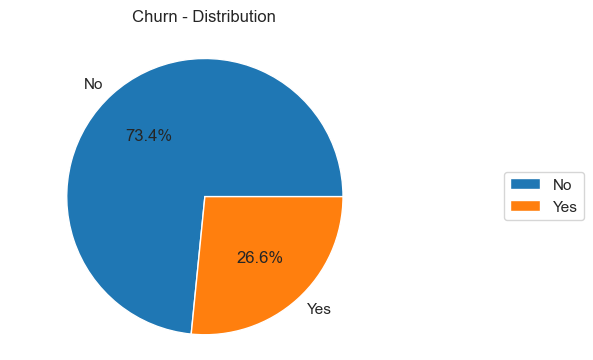

----------------------------------------------------------------------------------------------------


In [38]:
telecom1=telecom.drop('customerID', axis=1)
create_pie_charts(telecom1)

### D. Share insights for Q2.c.

1. Gender distribution is equal
2. Partner distribution is almost equal 
3. More than 2/3 people don't have dependents
4. 90% has phone service as distribution
5. Among customers having phone service, 42% has multiple distribution
6. about 44% has optic fibre for internet, 21% don;t have internet, rest have DSL
7. Around 30% has online security
8. only 35% have online backup
9. only 35% have device protection
10. only 30% have tech support
11. around 40% have TV streaming, which is also equal to people not having TV streaming
12. around 40% have Movies streaming, which is also equal to people not having Movie streaming
13. Almost half of member prefer having month-to-month contract. rest is distributed among one year and two year
14. 60% prefer paperless billing
15. one third prefer electronic check as payment, rest is equally distributed among mailed check, bank transfer and credit card
16. Churn rate= 1 among 4 customer


### E. Encode all the appropriate Categorical features with the best suitable approach.

In [39]:
#displaying datatype
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [40]:
# converting All object type to categorical type except customerID and Churn
#Also converting SeniorCitizen to Categorical has it has values 1 and 0


cat_col=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']


#taking backup
telecom2=telecom.copy()

#creating dummies as each categorical have maximum 3-4 uniue category
telecom=pd.get_dummies(telecom,columns=cat_col,drop_first=True)

In [41]:
telecom

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1.00,29.85,29.85,No,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34.00,56.95,"1,889.50",No,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2.00,53.85,108.15,Yes,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45.00,42.30,"1,840.75",No,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2.00,70.70,151.65,Yes,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24.00,84.80,"1,990.50",No,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7028,2234-XADUH,72.00,103.20,"7,362.90",No,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7029,4801-JZAZL,11.00,29.60,346.45,No,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7030,8361-LTMKD,4.00,74.40,306.60,Yes,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### F. Split the data into 80% train and 20% test.

In [42]:
x=telecom.drop(['customerID','Churn'], axis=1)
x

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.00,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34.00,56.95,"1,889.50",1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2.00,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45.00,42.30,"1,840.75",1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2.00,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24.00,84.80,"1,990.50",1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7028,72.00,103.20,"7,362.90",0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7029,11.00,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7030,4.00,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [43]:
y=telecom['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [44]:
x_train, x_test, y_train, y_test= train_test_split (x,y, stratify=y, test_size=.2, random_state=42)

In [45]:
x_train.shape, x_test.shape

((5625, 30), (1407, 30))

### G.Normalize/Standardize the data with the best suitable approach.

In [46]:
#Using Standard Scaler

x_train_standard=x_train.copy()

std_scale=StandardScaler()

x_train_standard[['tenure','MonthlyCharges','TotalCharges']]=std_scale.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])

In [47]:
x_test_standard=x_test.copy()

x_test_standard[['tenure','MonthlyCharges','TotalCharges']]=std_scale.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

In [48]:
x_train_standard.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1408,1.32,0.98,1.66,1,0,1,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
6992,-0.27,-0.97,-0.56,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3349,1.44,0.84,1.76,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
4486,-1.20,0.64,-0.91,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3535,0.67,-0.81,-0.10,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
x_test_standard.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
971,1.08,0.36,0.98,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0
618,-1.04,0.45,-0.78,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4282,0.87,-1.49,-0.54,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
3715,-1.25,-1.47,-0.99,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4525,1.57,1.33,2.31,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0


## 3. Model building and performance improvement

### A. Train a model using Decision tree and check the performance of the model on train and test data

Decision Tree model Summary:
Train Score 0.9987555555555555
Test Score 0.7064676616915423
----------------------------------------------------------------------------------------------------


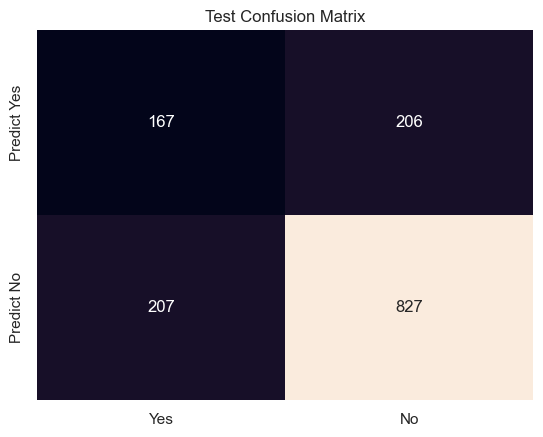

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4130
         Yes       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.80      0.80      0.80      1033
         Yes       0.45      0.45      0.45       374

    accuracy                           0.71      1407
   macro avg       0.62      0.62      0.62      1407
weighted avg       0.71      0.71      0.71      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
tenure                    

In [50]:
dTree= DecisionTreeClassifier(criterion='gini', random_state=42)
dTree.fit(x_train_standard,y_train)

print('Decision Tree model Summary:')
print('Train Score', dTree.score(x_train_standard,y_train))
print('Test Score', dTree.score(x_test_standard,y_test))
print('-'*100)

train_pred=dTree.predict(x_train_standard)

y_pred=dTree.predict(x_test_standard)
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(dTree.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


Dtree_test_summary=pd.DataFrame({
                                    'Model': ["Decision Tree"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })


Dtree_train_summary=pd.DataFrame({
                                    'Model': ["Decision Tree"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

In [51]:
#creating Dataframe to capture summary of all the models
all_model_train_summary=  pd.DataFrame()
all_model_train_summary=all_model_train_summary.append(Dtree_train_summary)

all_model_summary=  pd.DataFrame()
all_model_summary=all_model_summary.append(Dtree_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80


### B.Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [52]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [3,4,5,6,7,8,9,10,20,25,30],
    'random_state': [42],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,20],
}


clf = DecisionTreeClassifier()

# Perform grid search
grid_search_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_DT.fit(x_train_standard, y_train)

# Print the best parameters and best score
print("Best Train Score:", grid_search_DT.best_score_)

# Get the best hyperparameter values and model
best_params = grid_search_DT.best_params_
best_model_DT = grid_search_DT.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model_DT.score(x_test_standard, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Train Score: 0.7937777777777778
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 20, 'random_state': 42}
Test Accuracy: 0.7853589196872779


Decision Tree Grid model Summary:
Train Score 0.8124444444444444
Test Score 0.7853589196872779
----------------------------------------------------------------------------------------------------


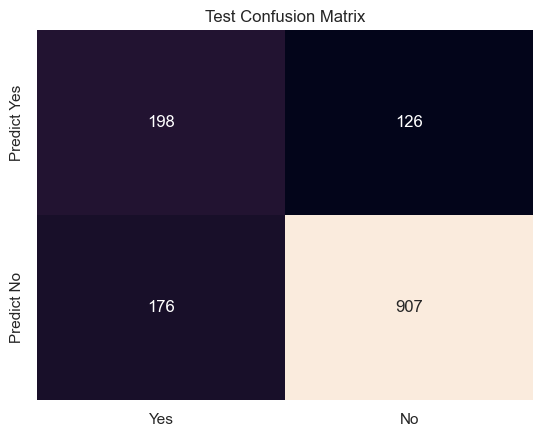

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      4130
         Yes       0.67      0.58      0.62      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.74      0.75      5625
weighted avg       0.81      0.81      0.81      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
tenure                    

In [53]:
# Creating Decision tree using best parameters

dTree_grid= DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=6, min_samples_leaf=1, min_samples_split=20)
dTree_grid.fit(x_train_standard,y_train)

print('Decision Tree Grid model Summary:')
print('Train Score', dTree_grid.score(x_train_standard,y_train))
print('Test Score', dTree_grid.score(x_test_standard,y_test))
print('-'*100)

train_pred=dTree_grid.predict(x_train_standard)

y_pred=dTree_grid.predict(x_test_standard)
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(dTree_grid.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


Dtree_grid_test_summary=pd.DataFrame({
                                    'Model': ["Decision Tree Grid"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })


Dtree_grid_train_summary=pd.DataFrame({
                                    'Model': ["Decision Tree Grid"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

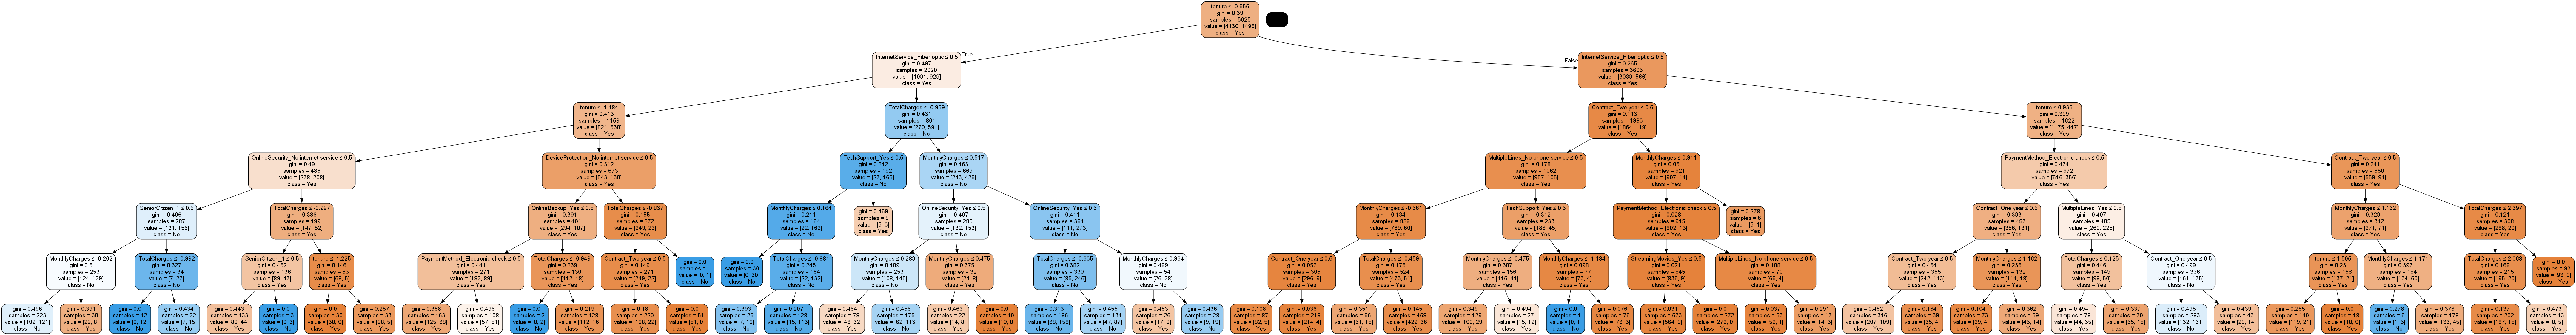

In [54]:
#Displaying Decision Tree
dot_data = StringIO()
export_graphviz(dTree_grid, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names=['Yes','No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ChurnDT.png')
display(Image('ChurnDT.png'))

In [55]:
all_model_train_summary=all_model_train_summary.append(Dtree_grid_train_summary)

all_model_summary=all_model_summary.append(Dtree_grid_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86


 **Observation** --> By using Grid seach, overfitting seems to be reduced as both train and test accuracy are near.
 Accuracy has been increased from 71% to 79%
 
 Precision of predicting Churn customer has been improved from .45 to .61. Same case for recall.
 
 
 ```
Decision Tree model Summary:
Train Score 0.9987555555555555
Test Score 0.7064676616915423

Decision Tree Grid model Summary:
Train Score 0.8124444444444444
Test Score 0.7853589196872779
 ```

### C. Train a model using Random forest and check the performance of the model on train and test data 

Ramdom Forest model Summary:
Train Score 0.9985777777777778
Test Score 0.783226723525231
----------------------------------------------------------------------------------------------------


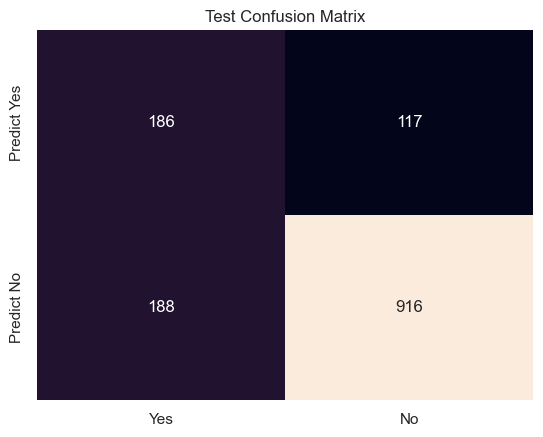

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4130
         Yes       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
TotalCharges              

In [56]:

rfcl = RandomForestClassifier(n_estimators = 50, random_state=42)
rfcl.fit(x_train_standard,y_train)

print('Ramdom Forest model Summary:')
print('Train Score', rfcl.score(x_train_standard,y_train))
print('Test Score', rfcl.score(x_test_standard,y_test))
print('-'*100)

train_pred=rfcl.predict(x_train_standard)

y_pred=rfcl.predict(x_test_standard)
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(rfcl.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


rfcl_test_summary=pd.DataFrame({
                                    'Model': ["Random Forest"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })

rfcl_train_summary=pd.DataFrame({
                                    'Model': ["Random Forest"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

In [57]:
all_model_train_summary=all_model_train_summary.append(rfcl_train_summary)

all_model_summary=all_model_summary.append(rfcl_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86


### D. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

In [58]:
param_grid = {
    'n_estimators': [50,100,150], 
    'criterion': ['gini'],  
    'max_depth': [4,5,6,7,8], 
    'min_samples_split': [15,20,25,30],
    'random_state': [42],
    'min_samples_leaf': [3,4,5,6],
    'max_features': ['sqrt', 'log2']
}

# Create a decision tree classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search_RF = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_RF.fit(x_train_standard, y_train)

# Print the best score
print("Best Train Score:", grid_search_RF.best_score_)

# Get the best hyperparameter values and model
best_params = grid_search_RF.best_params_
best_model_RF = grid_search_RF.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model_RF.score(x_test_standard, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Train Score: 0.8032
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 150, 'random_state': 42}
Test Accuracy: 0.7889125799573561


Random Forest Grid model Summary:
Train Score 0.8250666666666666
Test Score 0.7889125799573561
----------------------------------------------------------------------------------------------------


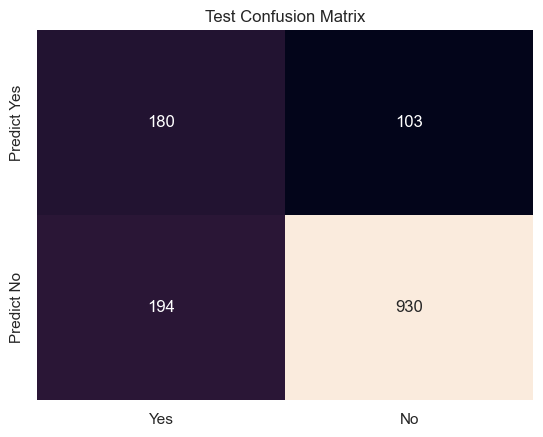

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.85      0.93      0.89      4130
         Yes       0.73      0.54      0.62      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.73      0.75      5625
weighted avg       0.82      0.83      0.82      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
tenure                    

In [59]:
# Creating Random Forest tree using best parameters

rfcl_grid= RandomForestClassifier(criterion='gini', random_state=42, max_depth=8, min_samples_leaf=4, min_samples_split=15,
                                  n_estimators=150)
rfcl_grid.fit(x_train_standard,y_train)

print('Random Forest Grid model Summary:')
print('Train Score', rfcl_grid.score(x_train_standard,y_train))
print('Test Score', rfcl_grid.score(x_test_standard,y_test))
print('-'*100)

train_pred=rfcl_grid.predict(x_train_standard)

y_pred=rfcl_grid.predict(x_test_standard)
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(rfcl_grid.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


rfcl_grid_test_summary=pd.DataFrame({
                                    'Model': ["Random Forest Grid"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })

rfcl_grid_train_summary=pd.DataFrame({
                                    'Model': ["Random Forest Grid"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

In [60]:
all_model_train_summary=all_model_train_summary.append(rfcl_grid_train_summary)

all_model_summary=all_model_summary.append(rfcl_grid_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86


**Observation** --> Grid search for random forest resulted in little bit of improvement in accuracy score, for churn customer precision has been increased by a small amount but recall decreased by a small amount as compared to original Random Forest model

Overfitting has been reduced compared to based model

```
Ramdom Forest model Summary:
Train Score 0.9985777777777778
Test Score 0.783226723525231

Random Forest Grid model Summary:
Train Score 0.8250666666666666
Test Score 0.7889125799573561
```

### E.Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )

Ada boost model Summary:
Train Score 0.8097777777777778
Test Score 0.7938877043354655
----------------------------------------------------------------------------------------------------


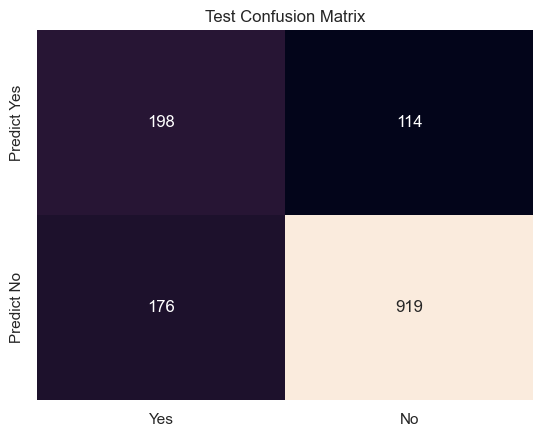

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4130
         Yes       0.67      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
TotalCharges              

In [61]:
ada= AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(x_train_standard,y_train)

print('Ada boost model Summary:')
print('Train Score', ada.score(x_train_standard,y_train))
print('Test Score', ada.score(x_test_standard,y_test))
print('-'*100)

train_pred=ada.predict(x_train_standard)

y_pred=ada.predict(x_test_standard)
cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(ada.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


Ada_test_summary=pd.DataFrame({
                                    'Model': ["Adaboost"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })

Ada_train_summary=pd.DataFrame({
                                    'Model': ["Adaboost"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

In [62]:
all_model_train_summary=all_model_train_summary.append(Ada_train_summary)

all_model_summary=all_model_summary.append(Ada_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86
0,Adaboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86


### F.Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f 

In [63]:
param_grid = {
    'n_estimators': [50,75,150,175],
    'learning_rate': [.001,.05,0.1,.5,.75,1],
    'random_state': [42]
}

# Create a decision tree classifier
adaB = AdaBoostClassifier()

# Perform grid search
grid_search_ada = GridSearchCV(estimator=adaB, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_ada.fit(x_train_standard, y_train)

# Print the best score
print("Best Train Score:", grid_search_ada.best_score_)

# Get the best hyperparameter values and model
best_params = grid_search_ada.best_params_
best_model_ada = grid_search_ada.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model_ada.score(x_test_standard, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Train Score: 0.8051555555555556
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 75, 'random_state': 42}
Test Accuracy: 0.7931769722814499


Adaboost Grid model Summary:
Train Score 0.8101333333333334
Test Score 0.7931769722814499
----------------------------------------------------------------------------------------------------


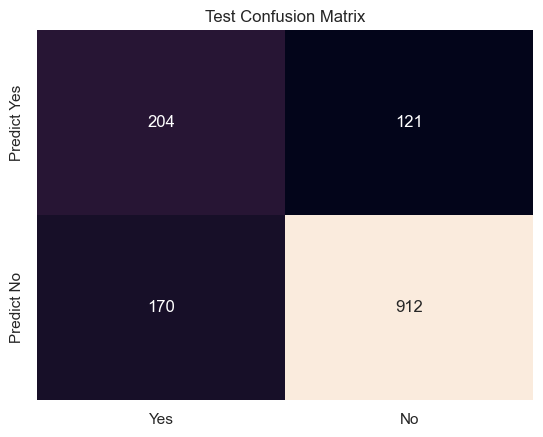

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      4130
         Yes       0.67      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1033
         Yes       0.63      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
TotalCharges              

In [64]:
# Creating Addbosting using best parameters

ada_grid= AdaBoostClassifier(random_state=42, n_estimators=75, learning_rate=1)
ada_grid.fit(x_train_standard,y_train)

print('Adaboost Grid model Summary:')
print('Train Score', ada_grid.score(x_train_standard,y_train))
print('Test Score', ada_grid.score(x_test_standard,y_test))
print('-'*100)

train_pred=ada_grid.predict(x_train_standard)
y_pred=ada_grid.predict(x_test_standard)

cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(ada_grid.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


ada_grid_test_summary=pd.DataFrame({
                                    'Model': ["Adaboost Grid"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })

ada_grid_train_summary=pd.DataFrame({
                                    'Model': ["Adaboost Grid"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')

})

In [65]:
all_model_train_summary=all_model_train_summary.append(ada_grid_train_summary)

all_model_summary=all_model_summary.append(ada_grid_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86
0,Adaboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,Adaboost Grid,0.79,0.63,0.84,0.55,0.88,0.58,0.86


**Observation** --> After performing grid search on ada boost, there isn't much improvement, recall for churn customer seems to be improved by a small amount

```
Ada boost model Summary:
Train Score 0.8097777777777778
Test Score 0.7938877043354655

Adaboost Grid model Summary:
Train Score 0.8101333333333334
Test Score 0.7931769722814499
```

### G.Train a model using GradientBoost and check the performance of the model on train and test data

Graident boost model Summary:
Train Score 0.8120888888888889
Test Score 0.7981520966595593
----------------------------------------------------------------------------------------------------


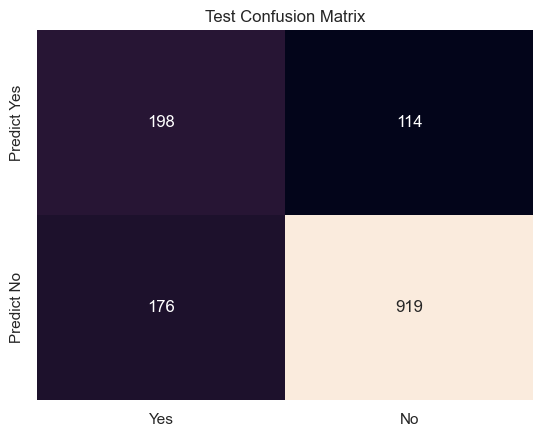

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.84      0.92      0.88      4130
         Yes       0.69      0.52      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.77      0.72      0.74      5625
weighted avg       0.80      0.81      0.80      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
tenure                    

In [66]:
gradientB= GradientBoostingClassifier(n_estimators=50, random_state=42)
gradientB.fit(x_train_standard,y_train)

print('Graident boost model Summary:')
print('Train Score', gradientB.score(x_train_standard,y_train))
print('Test Score', gradientB.score(x_test_standard,y_test))
print('-'*100)

train_pred=gradientB.predict(x_train_standard)
y_pred=ada.predict(x_test_standard)

cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(gradientB.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


GradientBoost_test_summary=pd.DataFrame({
                                    'Model': ["Gradientboost"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })


GradientBoost_train_summary=pd.DataFrame({
                                    'Model': ["Gradientboost"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')

})

In [67]:
all_model_train_summary=all_model_train_summary.append(GradientBoost_train_summary)

all_model_summary=all_model_summary.append(GradientBoost_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86
0,Adaboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,Adaboost Grid,0.79,0.63,0.84,0.55,0.88,0.58,0.86
0,Gradientboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86


### H.Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h

In [68]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1,.01],
    'max_depth': [3, 4,7],
    'random_state': [42],
    'subsample': [.5,.7,.9],
    'min_samples_split': [3,4,5,6,10], 
    'min_samples_leaf': [2, 3,5,10],
    'max_features': ['auto', 'sqrt']
}

# Create a decision tree classifier
gradB = GradientBoostingClassifier()

# Perform grid search
grid_search_gradB = GridSearchCV(estimator=gradB, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_gradB.fit(x_train_standard, y_train)

# Print the best score
print("Best Train Score:", grid_search_gradB.best_score_)

# Get the best hyperparameter values and model
best_params = grid_search_gradB.best_params_
best_model_gradB = grid_search_gradB.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model_gradB.score(x_test_standard, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Train Score: 0.8065777777777777
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.7}
Test Accuracy: 0.7974413646055437


Gradient Grid model Summary:
Train Score 0.8312888888888889
Test Score 0.7974413646055437
----------------------------------------------------------------------------------------------------


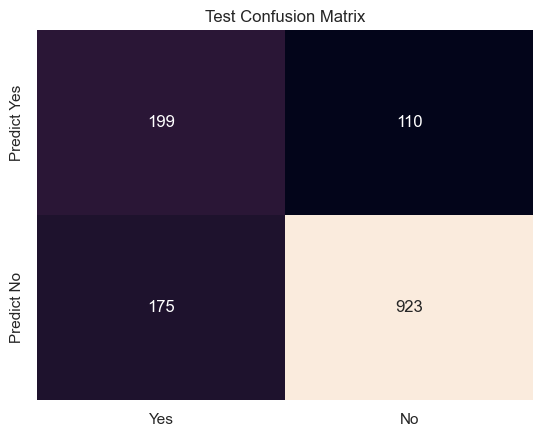

----------------------------------------------------------------------------------------------------
Train Classification Report
              precision    recall  f1-score   support

          No       0.86      0.92      0.89      4130
         Yes       0.73      0.58      0.65      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.77      5625
weighted avg       0.82      0.83      0.82      5625


Test Classification Report
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1033
         Yes       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

----------------------------------------------------------------------------------------------------
Important Features
                                       Imp
tenure                    

In [69]:
# Creating Gradient Bosoting using best parameters

gradB_grid= GradientBoostingClassifier(random_state=42, learning_rate=.1, max_depth=3, max_features='auto', min_samples_leaf=2,
                                      min_samples_split=5, n_estimators=100, subsample=.7)
gradB_grid.fit(x_train_standard,y_train)

print('Gradient Grid model Summary:')
print('Train Score', gradB_grid.score(x_train_standard,y_train))
print('Test Score', gradB_grid.score(x_test_standard,y_test))
print('-'*100)

train_pred=gradB_grid.predict(x_train_standard)
y_pred=gradB_grid.predict(x_test_standard)

cm=metrics.confusion_matrix(y_test, y_pred, labels=['Yes','No'])
cm=pd.DataFrame(cm, index=["Yes","No"], columns=['Predict Yes', 'Predict No'])
sns.heatmap(cm.T, annot=True, fmt='g', cbar=False);
plt.title('Test Confusion Matrix')
plt.show()
print('-'*100)

print('Train Classification Report')
print(metrics.classification_report(y_train, train_pred))
print()
print('Test Classification Report')
print(metrics.classification_report(y_test, y_pred))
print('-'*100)


print("Important Features")
print(pd.DataFrame(gradB_grid.feature_importances_, columns=['Imp'], index=x_train_standard.columns).
      sort_values(ascending=False, by='Imp'))


gradB_grid_test_summary=pd.DataFrame({
                                    'Model': ["GradientBoosting Grid"],
                                    'Test Score': metrics.accuracy_score(y_test,y_pred),
                                    'Precision_Yes' : metrics.precision_score(y_test, y_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_test, y_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_test, y_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_test, y_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_test, y_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_test, y_pred, pos_label='No')
                                })

gradB_grid_train_summary=pd.DataFrame({
                                    'Model': ["GradientBoosting Grid"],
                                    'Test Score': metrics.accuracy_score(y_train, train_pred),
                                    'Precision_Yes' : metrics.precision_score(y_train, train_pred, pos_label='Yes'),
                                    'Precision_No' : metrics.precision_score(y_train, train_pred, pos_label='No'),
                                    'Recall_Yes':   metrics.recall_score (y_train, train_pred,  pos_label='Yes'),
                                    'Recall_No':   metrics.recall_score (y_train, train_pred,  pos_label='No'),
                                    'F1-Score_Yes': metrics.f1_score(y_train, train_pred, pos_label='Yes'),
                                    'F1-Score_No': metrics.f1_score(y_train, train_pred, pos_label='No')
                                })

In [70]:
all_model_train_summary=all_model_train_summary.append(gradB_grid_train_summary)

all_model_summary=all_model_summary.append(gradB_grid_test_summary)
print('All models Test Summary')
all_model_summary

All models Test Summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86
0,Adaboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,Adaboost Grid,0.79,0.63,0.84,0.55,0.88,0.58,0.86
0,Gradientboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,GradientBoosting Grid,0.80,0.64,0.84,0.53,0.89,0.58,0.87


**Observation** -> Grid search has been able to improve the perfomance a bit in terms of Precision

```
Graident boost model Summary:
Train Score 0.8120888888888889
Test Score 0.7981520966595593

Gradient Grid model Summary:
Train Score 0.8312888888888889
Test Score 0.7974413646055437
```

After grid search, we are seeing improvement in understanding the train data, however test data seems same

### I. Provide detailed analysis of the below steps

### (1) Compare the performance of each model in train stage and test stage

In [73]:
print('All model train summary')
all_model_train_summary

All model train summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0,Decision Tree Grid,0.81,0.67,0.85,0.58,0.90,0.62,0.88
0,Random Forest,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0,Random Forest Grid,0.83,0.73,0.85,0.54,0.93,0.62,0.89
0,Adaboost,0.81,0.67,0.85,0.55,0.90,0.61,0.87
0,Adaboost Grid,0.81,0.67,0.85,0.55,0.90,0.61,0.87
0,Gradientboost,0.81,0.69,0.84,0.52,0.92,0.60,0.88
0,GradientBoosting Grid,0.83,0.73,0.86,0.58,0.92,0.65,0.89


In [74]:
print('All model test summary')
all_model_summary

All model test summary


,Model,Test Score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,F1-Score_Yes,F1-Score_No
0,Decision Tree,0.71,0.45,0.80,0.45,0.80,0.45,0.80
0,Decision Tree Grid,0.79,0.61,0.84,0.53,0.88,0.57,0.86
0,Random Forest,0.78,0.61,0.83,0.50,0.89,0.55,0.86
0,Random Forest Grid,0.79,0.64,0.83,0.48,0.90,0.55,0.86
0,Adaboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,Adaboost Grid,0.79,0.63,0.84,0.55,0.88,0.58,0.86
0,Gradientboost,0.79,0.63,0.84,0.53,0.89,0.58,0.86
0,GradientBoosting Grid,0.80,0.64,0.84,0.53,0.89,0.58,0.87


### (2) Provide your observation on which model performed the best and (3) Provide your reasoning on why the model performed best

**Observation** -> All models performance is similar in terms of accuracy. (except base decision tree)

Best models based on different metrics: 
 - Test score/Accuracy : Gradient Boosting 
 - Precision Yes- Gradient Boosting, Random Forest 
 - Precision No- All grid search model have similar result 
 - Recall Yes= AdaBoost 
 - Recall No- Random Forest 
 - F1 score Yes- Ada and Gradient boost 
 - F1 score No- Gradient
 
Overall when we consider different metrics, GradientBoosting seems to be performing well (However it takes lot of time for computation of grid search)

If computation resource are constraint then we can also consider Adaboost 

### (4) Provide your final conclusion on your observation


**observation** -> After perfoming grid search, performance of all the models are similar

- Overall when models predict that customer will not churn, they are correct almost 85% times.
- They are accurate 90% of finding actual customer that will not churn

Models are performing well for predicting that customer will not churn

- However, when model predict that customer will churn they are accurate in only 64% of cases
- out of customers they have churned, model are able to predict only 53% of actual customers

Model are not performing well in case where a customer churns (either identifying actual cases or predicting them). These might indicate that there are certain data impacting churn customers not getting captured

Following columns are considered as important by different models for prediction:
 - tenure
 - InternetService_Fiber optic
 - TotalCharges
 - MonthlyCharges
 - PaymentMethod_Electronic check        
 
It should be ensured that data is getting captured properly for them